In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

In [2]:
n = 10
np.random.randint(1, n, size=n)

array([4, 4, 1, 1, 2, 8, 2, 6, 2, 3])

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
data = pd.read_csv(r'C:\Users\student\Desktop\train.csv')

In [7]:
df = pd.DataFrame(data)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
y = df['Survived'].values
df = df.drop(['Survived'], axis=1)

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [15]:
feat_names = ['Age', 'Sex', 'SibSp', 'Pclass', 'Parch', 'Fare']
df = df[feat_names]

In [16]:
df['Sex'] = (df['Sex'] == 'male').astype(int)

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [17]:
df.head()

,Age,Sex,SibSp,Pclass,Parch,Fare
0,22.0,1,1,3,0,7.2500
1,38.0,0,1,1,0,71.2833
2,26.0,0,0,3,0,7.9250
3,35.0,0,1,1,0,53.1000
4,35.0,1,0,3,0,8.0500


In [20]:
x_train, x_test, y_train, y_test = train_test_split(df, y, random_state=10) 

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
tree.predict_proba(x_test)

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 0.        ,  1.        ],
       [ 1.        ,  0.        ],
       [ 1.        ,  0.        ],
       [ 0.        ,  1.        ],
       [ 1.        ,

In [26]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred = tree.predict_proba(x_test)[:,1]
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test, tree.predict(x_test)))

0.783924095954
0.807174887892


In [28]:
from sklearn.metrics import make_scorer

In [29]:
params = {'max_depth':[x+1 for x in range(50)], 'criterion':['gini', 'entropy']}
gcv_tree = GridSearchCV(DecisionTreeClassifier(), params, scoring='roc_auc')
gcv_tree.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [30]:
gcv_tree.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [32]:
roc_auc_score(y_test, gcv_tree.best_estimator_.predict_proba(x_test)[:, 1])

0.88475653419262423

In [35]:
gcv_tree.cv_results_.keys()

dict_keys(['split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score', 'mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_criterion', 'param_max_depth', 'params'])

In [40]:
res_tree = gcv_tree.cv_results_

In [41]:
score = np.array(res_tree['mean_test_score'])
crit = np.array(res_tree['param_criterion'])
depth = np.array(res_tree['param_max_depth'])

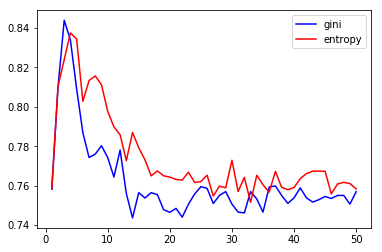

In [51]:
# score = roc_auc
idx = crit == 'gini' #boolean mask for res_tree_params_crit
plt.plot(depth[idx], score[idx], color='b', label='gini')
idx = crit == 'entropy'
plt.plot(depth[idx], score[idx], color='r', label='entropy')
plt.legend()

In [65]:
rf = RandomForestClassifier(100, n_jobs=-1, oob_score=True)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=-1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [59]:
roc_auc_score(y_test, rf.predict_proba(x_test)[:, 1])

0.87589509488005735

In [64]:
# не всегда при удалении неважных качество растет
rf.feature_importances_

array([ 0.27299837,  0.25326555,  0.05636095,  0.08537179,  0.03861532,
        0.29338801])

In [66]:
# считать качетсво по объектам, что не попали в бутсрэп выборку
# считает accuracy
rf.oob_score_

0.79341317365269459